<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('/Users/jameswilliams/Google Drive/Coding/GA Data Science/Projects/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# check the shape to determine rows and columns
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# most of the columns have objects data types
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# the mean is about 121 minutes
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [10]:
# sorted by durration first then used iloc to find first and last five rows: shortest is Freaks at 64 minutes and longest is Hamelt at 242 minutes
movies_sorted = movies.sort_values('duration')
movies_shortest = movies_sorted.iloc[:5]
movies_shortest

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [11]:
movies_longest = movies_sorted.iloc[-5:]
movies_longest

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

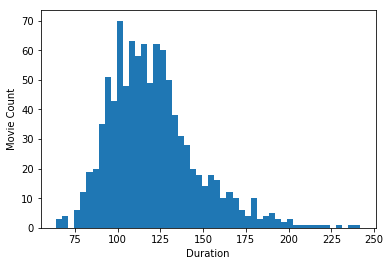

In [7]:
# I chose 50 bins because it seemed to sample the movies by duration an adequate amount to see distribution 
movies.duration.plot(kind='hist', bins=50);
plt.xlabel('Duration');
plt.ylabel('Movie Count');

#### Use a box plot to display that same data.

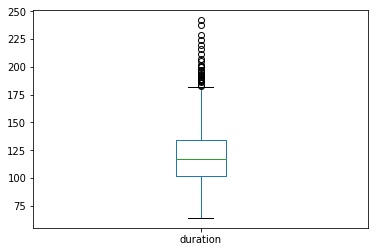

In [8]:
# The box plot shows that that the median duration is between 100 and 125 minutes
movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# R is the most common rating in the data set.
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

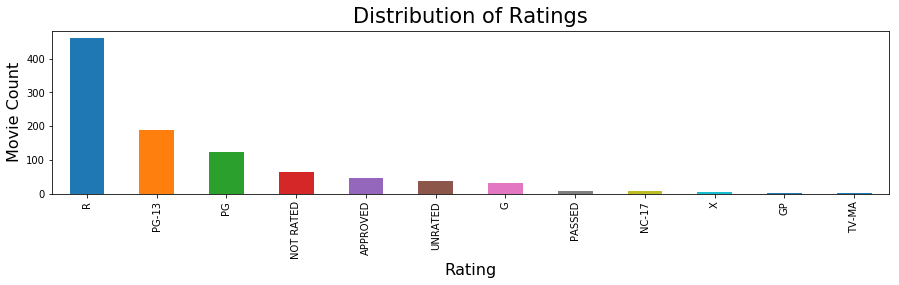

In [10]:
# create a bar chart
chart = movies.content_rating.value_counts().plot(kind='bar', figsize=(15,3));

# make title
chart.set_title('Distribution of Ratings', fontsize=21, y=1.01);

# label x-axis 
chart.set_ylabel('Movie Count', fontsize=16);

# label y-axis 
chart.set_xlabel('Rating', fontsize=16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [21]:
# simplify ratings using .replace
movies = movies.replace({'NOT RATED':'UNRATED', 'APPROVED':'UNRATED', 'PASSED':'UNRATED', 'GP':'UNRATED'})
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.


In [22]:
# simplify ratings using .replace
movies = movies.replace({'X':'NC-17', 'TV-MA':'NC-17'})
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Count the number of missing values in each column.

In [23]:
# there are three missing values for content ratings in data set
movies.isnull().sum(axis = 0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [12]:
# fill missing values with "UNRATED"
movies.content_rating.fillna(value= "UNRATED", inplace = True)
# verify that missing values were filled
movies.isnull().sum(axis = 0)

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [25]:
# the average star rating for two hours or longer is 7.95 
long_movies = movies[(movies['duration'] >= 120)]
long_movies.loc[:,"star_rating"].mean()

7.948898678414082

In [26]:
# the average star rating for less than two hours is 7.84
short_movies = movies[(movies['duration'] < 120)]
short_movies.loc[:,"star_rating"].mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

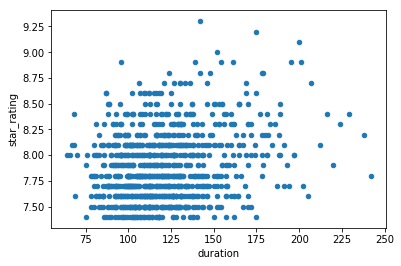

In [27]:
# scatter plot doesn't show an obvious trend
movies.plot.scatter(x='duration', y='star_rating');

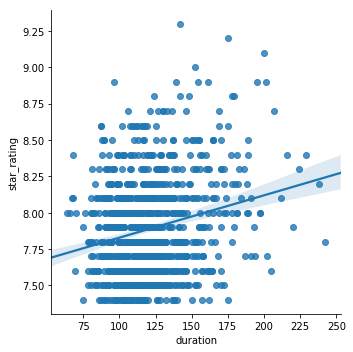

In [14]:
# seaborn regression shows some positive linear relationship between duration and rating
sns.lmplot(x='duration', y='star_rating', data=movies);

#### Calculate the average duration for each genre.

In [28]:
# westerns have longest mean duration at 137 minutes... this makes sense, usually they're slow and super boring
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

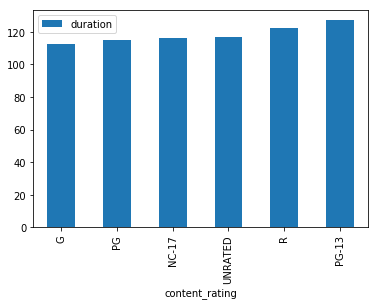

In [38]:
# bar chart shows that lower content ratings are on average slightly shorter
movies.groupby('content_rating').mean().sort_values('duration').drop('star_rating', axis=1).plot(kind='bar');

#### Determine the top rated movie (by star rating) for each genre.

In [43]:
# dark knight is the top rated action movie!
sorted_movies = movies.sort_values('star_rating', ascending=False)
sorted_movies.groupby('genre').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
38,8.6,Rear Window,APPROVED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [17]:
# there are four duplicates
movies.duplicated(['title']).sum() 

4

In [19]:
# the duplicates are girl with dragon tattoo, true grit, les miserables, and dracula
movies[movies['title'].duplicated(False)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [24]:
# calculate number of movies for each genre to see which ones have at least 10 in data set
genre_counts = movies.genre.value_counts()
genre_counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [111]:
# create filter using a list of genres with 10 or more rows observed from above calcuation
movies_filter = movies[(movies['genre'] == 'Drama') | (movies['genre'] == 'Comedy') | (movies['genre'] == 'Action') | (movies['genre'] == 'Crime') | (movies['genre'] == 'Biography') | (movies['genre'] == 'Adventure') | (movies['genre'] == 'Animation') | (movies['genre'] == 'Horror') | (movies['genre'] == 'Mystery')]
movies_filter.groupby('genre')['star_rating'].agg(['mean'])

,mean
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [34]:
# automatically create a list of genres with 10 or more movies in data set
relevant_genres = list(genre_counts[genre_counts>10].index) 
movies_filter = movies['genre'].isin(relevant_genres)
movies[movies_filter].groupby('genre')['star_rating'].agg(['mean'])

,mean
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [36]:
# calculates average star rating for each genre then filters by boolean series
mean_list = movies.groupby('genre')['star_rating'].agg(['mean'])
series = movies.genre.value_counts() > 9
mean_list[series.values]

,mean
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000


#### Option 4: aggregate by count and mean, then filter using the count

In [40]:
# aggregates by count and mean, then sorts and filters 
movies_aggregated = movies.groupby('genre').star_rating.agg(['count', 'mean'])
sorted_aggregate = movies_aggregated.sort_values('count')
sorted_aggregate[(sorted_aggregate['count'] > 9)]

,count,mean
genre,,
Mystery,16,7.975000
Horror,29,7.806897
Animation,62,7.914516
Adventure,75,7.933333
Biography,77,7.862338
Crime,124,7.916935
Action,136,7.884559
Comedy,156,7.822436
Drama,278,7.902518


## Bonus

#### Figure out something "interesting" using the actors data!

In [42]:
# there are 969 unique actor names; harry potter actors show up the most
movies['actors_list'].describe()

count                                                   979
unique                                                  969
top       [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
freq                                                      6
Name: actors_list, dtype: object